In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def slow_release_df(N_0,time):
    df=pd.DataFrame({
        "Time (Hours)":[0],
        "N_t":[N_0]})
    for i in np.arange(1,time+1):
        N_0-=0.1*N_0
        N_0+=10*np.power(0.4,i)
        x={"Time (Hours)":i,"N_t":N_0,}
        df=df.append(x,ignore_index=True)
    return df

In [3]:
df=slow_release_df(0,24)
df

,Time (Hours),N_t
0,0.0,0.000000
1,1.0,4.000000
2,2.0,5.200000
3,3.0,5.320000
4,4.0,5.044000
5,5.0,4.642000
6,6.0,4.218760
7,7.0,3.813268
8,8.0,3.438495
9,9.0,3.097267


In [4]:
df.sort_values("N_t",ascending=False).head(1)

,Time (Hours),N_t
3,3.0,5.32


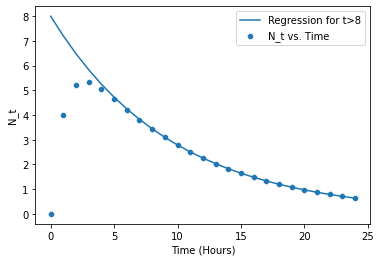

In [8]:
df_10=df[df["Time (Hours)"]>8]
df_exp=np.exp(np.polyfit(x=df_10["Time (Hours)"],y=np.log(df_10["N_t"]),deg=1))
sns.scatterplot(data=df,x="Time (Hours)",y="N_t",label="N_t vs. Time")
sns.lineplot(data=df,x="Time (Hours)",y=df_exp[1]*np.power(df_exp[0],df["Time (Hours)"]),label="Regression for t>8")
plt.ylabel("N_t")
plt.xlabel("Time (Hours)")
plt.savefig("Math_142_HW_2_Q_3a")